In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from hyperparameter_search import grid_search, random_search
from visualization import plot_results

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

train_dataset = datasets.MNIST(root='data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='data', train=False, transform=transform)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.05MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.39MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
param_grid = {
    'learning_rate': [1e-3, 1e-2, 1e-1],
    'batch_size': [16, 32, 64],
    'dropout_rate': [0.3, 0.5, 0.7]
}

In [5]:
grid_results = grid_search(train_dataset, test_dataset, param_grid, device)

Training with LR: 0.001, Batch Size: 16, Dropout: 0.3
Epoch [1/5], Loss: 0.1553
Epoch [2/5], Loss: 0.0635
Epoch [3/5], Loss: 0.0479
Epoch [4/5], Loss: 0.0381
Epoch [5/5], Loss: 0.0307
Accuracy: 0.9930
Training with LR: 0.001, Batch Size: 16, Dropout: 0.5
Epoch [1/5], Loss: 0.2150
Epoch [2/5], Loss: 0.0894
Epoch [3/5], Loss: 0.0677
Epoch [4/5], Loss: 0.0548
Epoch [5/5], Loss: 0.0463
Accuracy: 0.9899
Training with LR: 0.001, Batch Size: 16, Dropout: 0.7
Epoch [1/5], Loss: 0.3701
Epoch [2/5], Loss: 0.1793
Epoch [3/5], Loss: 0.1379
Epoch [4/5], Loss: 0.1071
Epoch [5/5], Loss: 0.0935
Accuracy: 0.9907
Training with LR: 0.001, Batch Size: 32, Dropout: 0.3
Epoch [1/5], Loss: 0.1735
Epoch [2/5], Loss: 0.0649
Epoch [3/5], Loss: 0.0465
Epoch [4/5], Loss: 0.0365
Epoch [5/5], Loss: 0.0315
Accuracy: 0.9912
Training with LR: 0.001, Batch Size: 32, Dropout: 0.5
Epoch [1/5], Loss: 0.2113
Epoch [2/5], Loss: 0.0823
Epoch [3/5], Loss: 0.0617
Epoch [4/5], Loss: 0.0498
Epoch [5/5], Loss: 0.0420
Accuracy: 0.

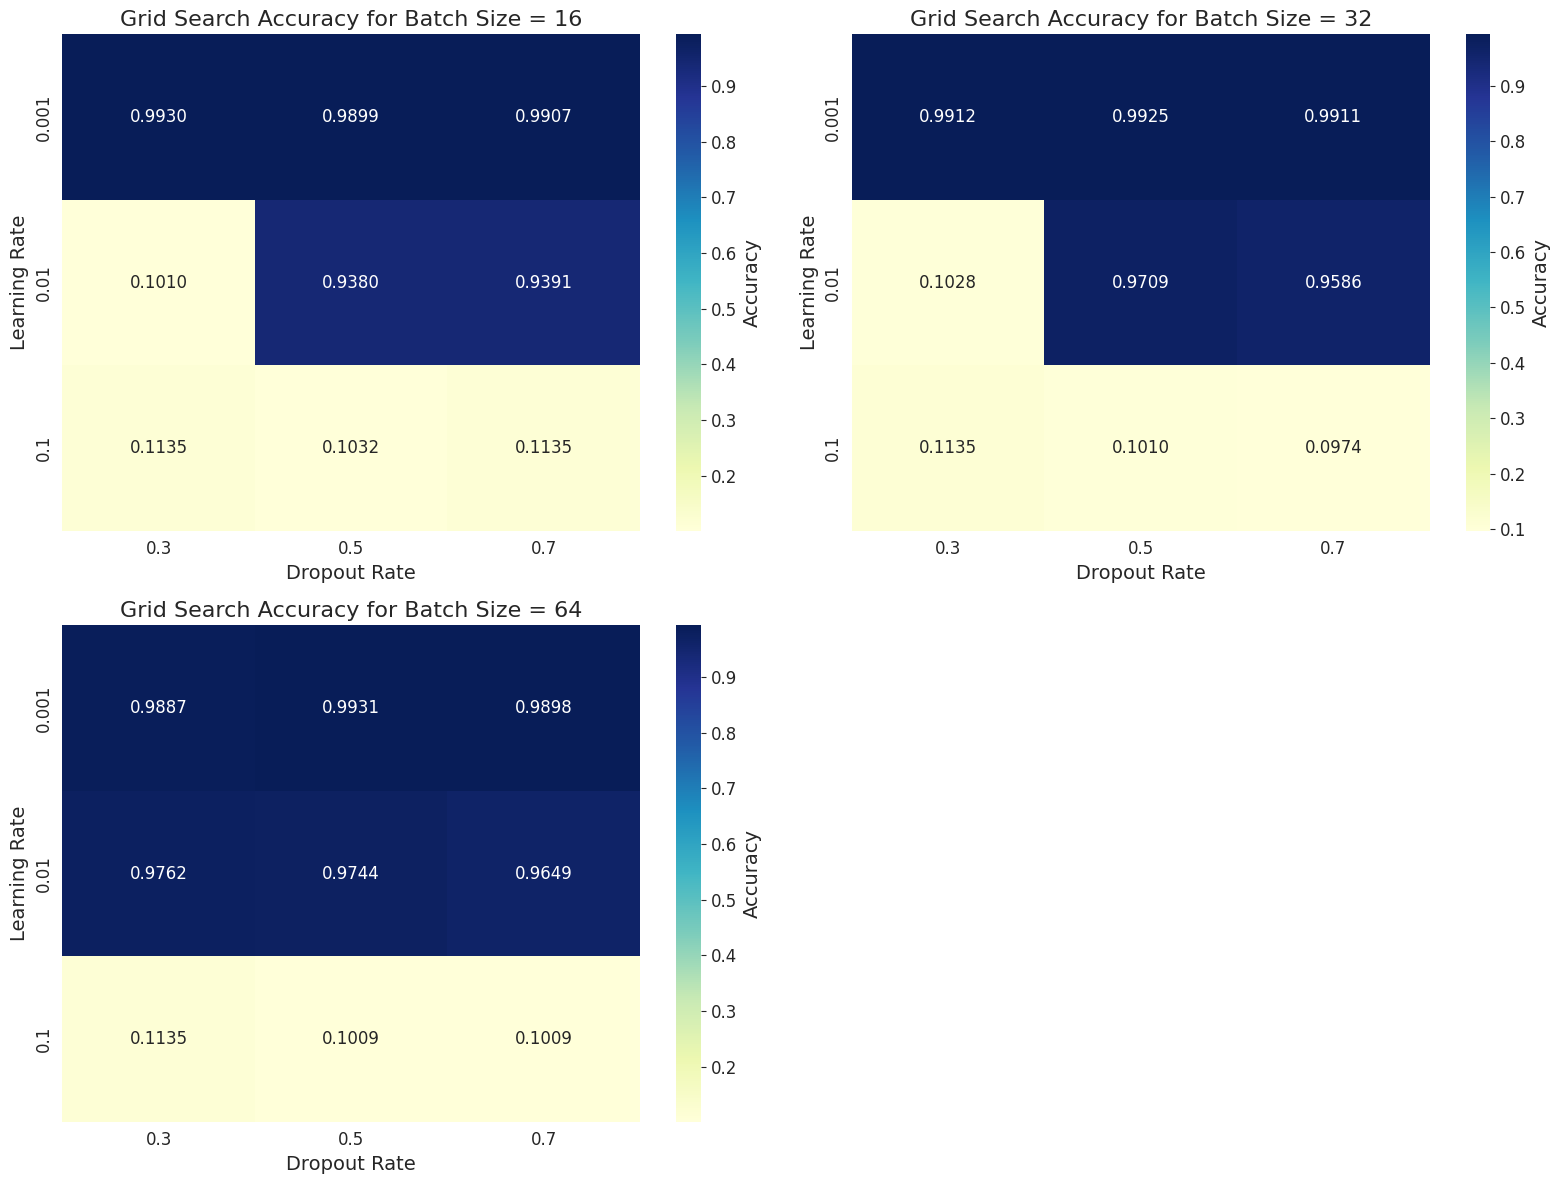

In [6]:
plot_results(grid_results, title='Grid Search Results')

In [5]:
random_results = random_search(train_dataset, test_dataset, param_grid, device, n_trials=10)

Training with LR: 0.001, Batch Size: 64, Dropout: 0.3
Epoch [1/5], Loss: 0.2158
Epoch [2/5], Loss: 0.0664
Epoch [3/5], Loss: 0.0484
Epoch [4/5], Loss: 0.0380
Epoch [5/5], Loss: 0.0311
Accuracy: 0.9911
Training with LR: 0.1, Batch Size: 32, Dropout: 0.5
Epoch [1/5], Loss: 4.0178
Epoch [2/5], Loss: 2.3135
Epoch [3/5], Loss: 2.3140
Epoch [4/5], Loss: 2.3128
Epoch [5/5], Loss: 2.3137
Accuracy: 0.0958
Training with LR: 0.01, Batch Size: 64, Dropout: 0.7
Epoch [1/5], Loss: 0.4416
Epoch [2/5], Loss: 0.2913
Epoch [3/5], Loss: 0.2765
Epoch [4/5], Loss: 0.2658
Epoch [5/5], Loss: 0.2698
Accuracy: 0.9655
Training with LR: 0.001, Batch Size: 16, Dropout: 0.7
Epoch [1/5], Loss: 0.3421
Epoch [2/5], Loss: 0.1501
Epoch [3/5], Loss: 0.1119
Epoch [4/5], Loss: 0.0965
Epoch [5/5], Loss: 0.0833
Accuracy: 0.9916
Training with LR: 0.01, Batch Size: 64, Dropout: 0.3
Epoch [1/5], Loss: 0.3100
Epoch [2/5], Loss: 0.1642
Epoch [3/5], Loss: 0.1421
Epoch [4/5], Loss: 0.1322
Epoch [5/5], Loss: 0.1277
Accuracy: 0.9632

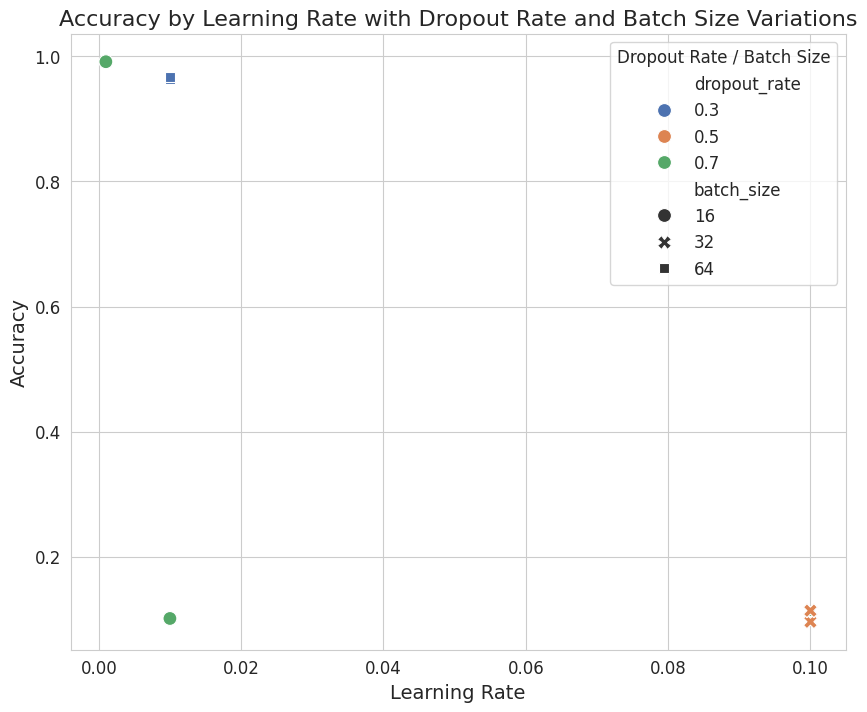

In [8]:
plot_results(random_results, title='Random Search Results')